# International Students in Canada 2015-2023 - Prediction 2024 to 2030 

## Loading Data
Import the necessary libraries and load the data.

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Improve visualization
%matplotlib inline
sns.set_theme(style="darkgrid")


df_student = pd.read_csv(r"C:\Users\succe\Downloads\Internation_students_Canada.csv")
df_province = pd.read_csv(r"C:\Users\succe\Downloads\Internation_students_Province_Canada.csv")
df_study = pd.read_csv(r"C:\Users\succe\Downloads\International_Students_Study_level.csv")

## International Students in Canada from different countries from 2015-2023

In [210]:
# Shows the first rows of the dataset
print(df_student.head())
print("\n")
# Dataset information
df_student.info()
print("\n")
# Statistical summary
df_student.describe()

  Country of Citizenship  2015  2016  2017  2018  2019  2020  2021  2022  2023
0            Afghanistan    95   115    95    80    95    90    80   170   140
1                Albania   115   165   185   245   375   250   305   345   545
2                Algeria  1060   845  1020  1490  2690  2170  3165  5360  7180
3                Andorra     0     0     0     0     0     0    10     5     0
4                 Angola    65    80    40    25   120    30    50    75    65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country of Citizenship  217 non-null    object
 1   2015                    217 non-null    int64 
 2   2016                    217 non-null    int64 
 3   2017                    217 non-null    int64 
 4   2018                    217 non-null    int64 
 5   2019                    217 non-null    int64 
 6 

,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,1047.649770,1268.917051,1510.967742,1692.741935,1898.986175,1245.668203,2121.059908,2616.036866,2740.414747
std,5362.640744,6741.540436,8403.593118,9729.000854,11360.882179,7180.221219,12670.061927,16425.316706,15791.033191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,10.000000,10.000000,10.000000,10.000000,5.000000,15.000000,15.000000,20.000000
50%,85.000000,100.000000,105.000000,105.000000,120.000000,70.000000,135.000000,145.000000,145.000000
75%,335.000000,420.000000,445.000000,475.000000,540.000000,415.000000,630.000000,665.000000,775.000000
max,68350.000000,80525.000000,87290.000000,109290.000000,140250.000000,84590.000000,174595.000000,232640.000000,220035.000000


In [260]:
# Check for missing values
print(df_student.isnull().sum())
print(df_province.isnull().sum())
print(df_study.isnull().sum())

# Check data types
print(df_student.dtypes)
print(df_province.dtypes)
print(df_study.dtypes)

# If there are missing values, you can handle them:
df_student.fillna(0, inplace=True)  # or any strategy like mean/median
df_province.fillna(0, inplace=True)
df_study.fillna(0, inplace=True)


Country/Territory    0
2015                 0
2016                 0
2017                 0
2018                 0
2019                 0
2020                 0
2021                 0
2022                 0
2023                 0
dtype: int64
Province/Territory    0
Sex                   0
2015                  0
2016                  0
2017                  0
2018                  0
2019                  0
2020                  0
2021                  0
2022                  0
2023                  0
dtype: int64
Province/Territory    0
study level           0
2015                  0
2016                  0
2017                  0
2018                  0
2019                  0
2020                  0
2021                  0
2022                  0
2023                  0
dtype: int64
Country/Territory    object
2015                  int64
2016                  int64
2017                  int64
2018                  int64
2019                  int64
2020                  int64
2021   

In [264]:
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
for year in years:
    df_student[year] = pd.to_numeric(df_student[year], errors='coerce')
    df_province[year] = pd.to_numeric(df_province[year], errors='coerce')
    df_study[year] = pd.to_numeric(df_study[year], errors='coerce')

# Temporal Analysis of International Students in Canada (2015-2030)

### Overview
This analysis examines how the number of international students in Canada has changed over the years, providing insights into the trends, growth rates, and predictions for future years. The analysis is based on data from 2015 to 2023, with predictions for 2024–2030.
### Key Insights
1. **Trend Analysis (2015-2023)**
2. **Impact of COVID-19 (2020)**
3. **Predictions for 2024-2030**

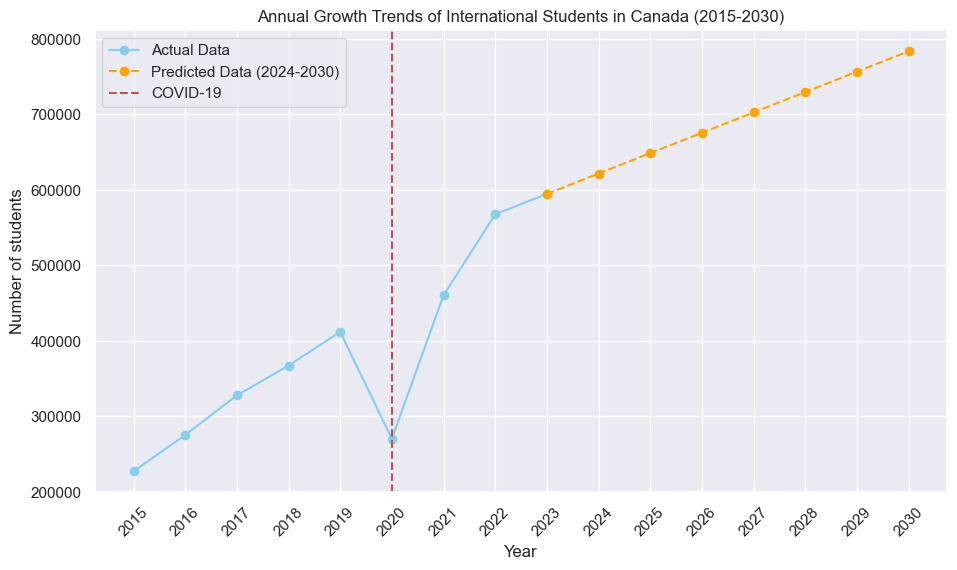

In [152]:
# Sum the number of students for each year (modify according to your data)
students_per_year = df_student.iloc[:, 1:].sum().head(9)

# Convert the index to int (assuming your columns are years)
students_per_year.index = students_per_year.index.astype(int)

# Calculate the trend (simple linear prediction based on the last 2 data points)
last_known_year = students_per_year.index[-1]
last_known_value = students_per_year.iloc[-1]
avg_increase = (students_per_year.iloc[-1] - students_per_year.iloc[-2])

# Predict future years (2023-2030)
future_years = np.arange(2023, 2031)
future_predictions = [last_known_value + (i - last_known_year) * avg_increase for i in future_years]

# Add the future predictions to the students_per_year data
future_predictions_series = pd.Series(future_predictions, index=future_years)
students_per_year_future = pd.concat([students_per_year, future_predictions_series])

# Plotting the number of students per year
plt.figure(figsize=(11, 6))
students_per_year.plot(kind='line', marker='o', color='skyblue', label='Actual Data')

# Plot the predicted future years
plt.plot(future_years, future_predictions, marker='o', color='orange', linestyle='--', label='Predicted Data (2024-2030)')

# annotation 
plt.axvline(x=2020, color='r', linestyle='--', label='COVID-19')

# Customize plot
plt.title('Annual Growth Trends of International Students in Canada (2015-2030)')
plt.xlabel('Year')
plt.ylabel('Number of students')
plt.xticks(np.arange(2015, 2031, 1), rotation=45) 
plt.legend()
plt.show()


### Analysis by Country

Identify the main countries of origin of the students.

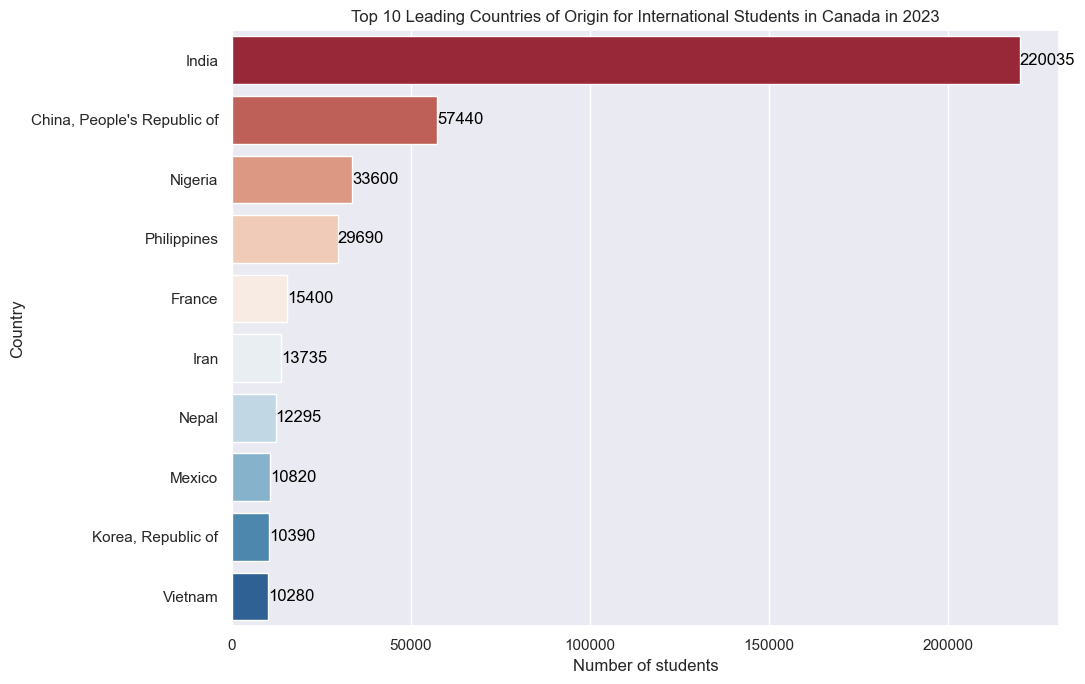

In [156]:
# Sum of students per country in the last available year
top_countries = df_student[['Country of Citizenship', '2023']].sort_values(by='2023', ascending=False).head(10)

# Bar chart for major countries
plt.figure(figsize=(11, 7))
barplot = sns.barplot(x='2023', y='Country of Citizenship', data=top_countries, hue='Country of Citizenship', palette='RdBu', legend=False)


# Add the total number of students in each bar
for index, value in enumerate(top_countries['2023']):
    plt.text(value, index, str(value), color='black', va='center')

plt.title('Top 10 Leading Countries of Origin for International Students in Canada in 2023')
plt.xlabel('Number of students')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [190]:
# Total number of students per country throughout all years
df_student['Total'] = df_student.iloc[:, 1:].sum(axis=1)

# Select the top 10 countries based on total sum
top_countries_total = df_student.sort_values(by='Total', ascending=False).head(10)

# Names of the top 10 countries
top_countries_names = top_countries_total['Country of Citizenship']

In [192]:
# Filters the original DataFrame to include only the top 10 countries
data_for_plot = df_student[df_student['Country of Citizenship'].isin(top_countries_names)]

# Select only the year columns for the top 10 countries
years_columns = df_student.columns[1:-1]  # Excludes previously added 'Total' column
data_for_plot_years = data_for_plot[years_columns]

### Number of International Students per Year from the Top 10 Countries
This approach allows you to see how the contribution of each of the top 10 countries has varied over the years in terms of international students in Canada

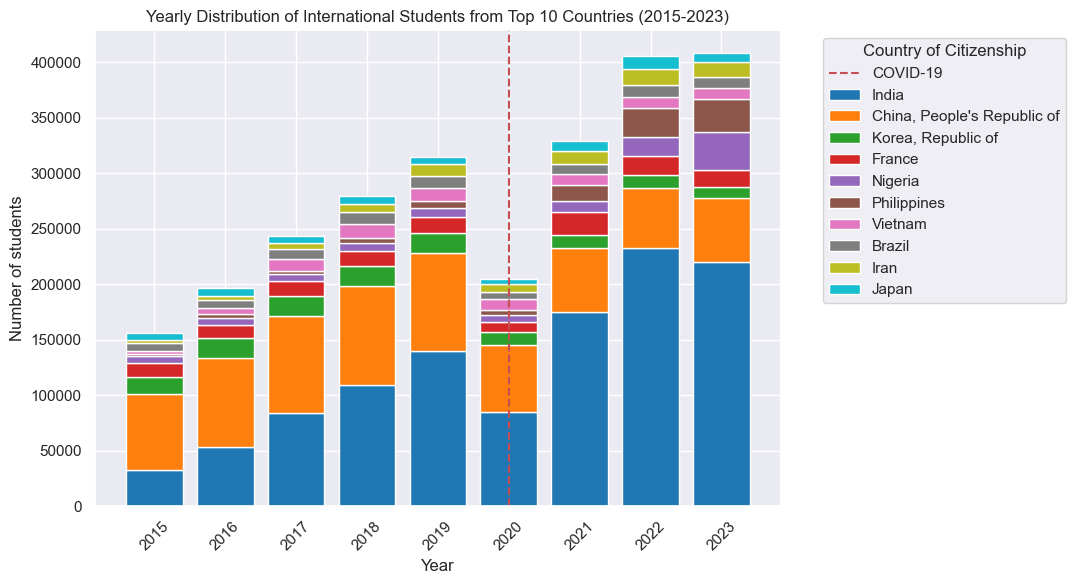

In [194]:
# Matplotlib initial setup
plt.figure(figsize=(11, 6))

# Colors for each country (optional, but helps visual distinction)
colors = plt.cm.tab10(np.linspace(0, 1, len(top_countries_names)))

# Loop to stack the values of each country
bottom = np.zeros(len(years_columns))  

for i, country in enumerate(top_countries_names):
    values = data_for_plot[data_for_plot['Country of Citizenship'] == country][years_columns].iloc[0]
    plt.bar(years_columns, values, bottom=bottom, color=colors[i], label=country)
    bottom += values  # Update the base for the next iteration

# Add details to the chart
plt.title('Yearly Distribution of International Students from Top 10 Countries (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Number of students')
plt.xticks(rotation=45)

# Add annotation for 2020 (COVID-19)
plt.axvline(x='2020', color='r', linestyle='--', label='COVID-19')

# Add legend and layout adjustments
plt.legend(title='Country of Citizenship', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the graph
plt.show()

## Trend Analysis of International Students by Country

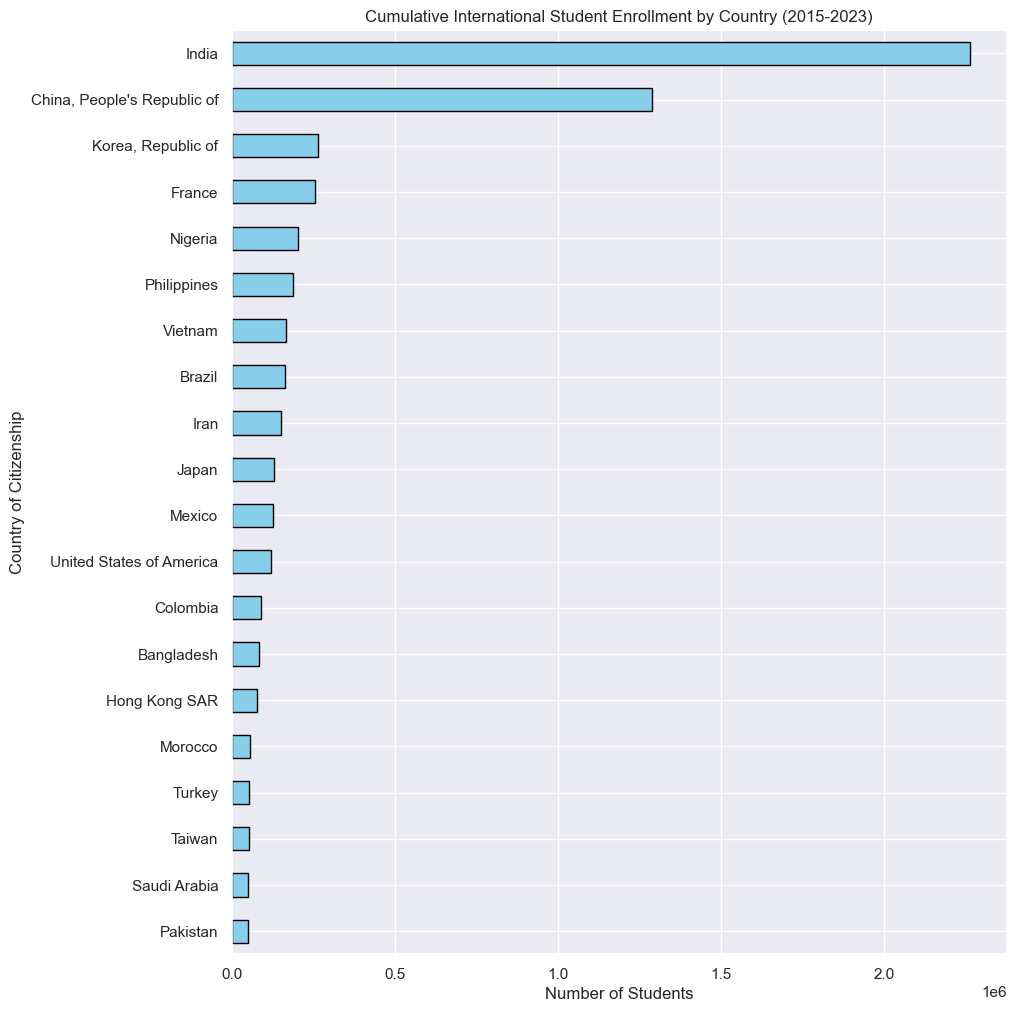

In [196]:
# Sum up the student numbers for each country across the years
df_student.set_index('Country of Citizenship', inplace=True)
total_by_country = df_student.sum(axis=1).sort_values(ascending=True)  

# Plotting the top 20 countries with country names on the y-axis
plt.figure(figsize=(10, 12)) 
total_by_country.tail(20).plot(kind='barh', color='skyblue', edgecolor='black')  
plt.title('Cumulative International Student Enrollment by Country (2015-2023)')
plt.ylabel('Country of Citizenship')
plt.xlabel('Number of Students')
plt.show()

## International Students in Canada by Province and Gender

In [198]:
# Shows the first rows of the dataset
print(df_province.head())
print("\n")
# Dataset information
df_province.info()
print("\n")
# Statistical summary
df_province.describe()

          Province/territory             Sex   2015   2016   2017   2018  \
0  Newfoundland and Labrador          Female    570    745    865    900   
1  Newfoundland and Labrador            Male  1,075  1,240  1,370  1,400   
2  Newfoundland and Labrador  Another gender      0      0      0      0   
3      Prince Edward Island           Female    425    525    670    765   
4      Prince Edward Island             Male    485    650    780  1,090   

    2019 2020   2021   2022   2023  
0  1,050  530  1,270  1,600  1,535  
1  1,565  850  2,025  2,290  2,205  
2      0    0      0      0      0  
3    885  615    905  1,120  1,360  
4  1,010  680    985  1,280  1,435  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Province/territory  44 non-null     object
 1   Sex                 43 non-null     object
 2   2015               

,Province/territory,Sex,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,44,43,44,44,44,44,44,44,44,44,44
unique,14,4,25,25,26,27,26,25,27,28,28
top,Nova Scotia,Female,0,0,0,0,0,0,0,0,0
freq,4,13,19,19,18,18,16,19,17,15,13


## Analysis by Province with Gender Distribution

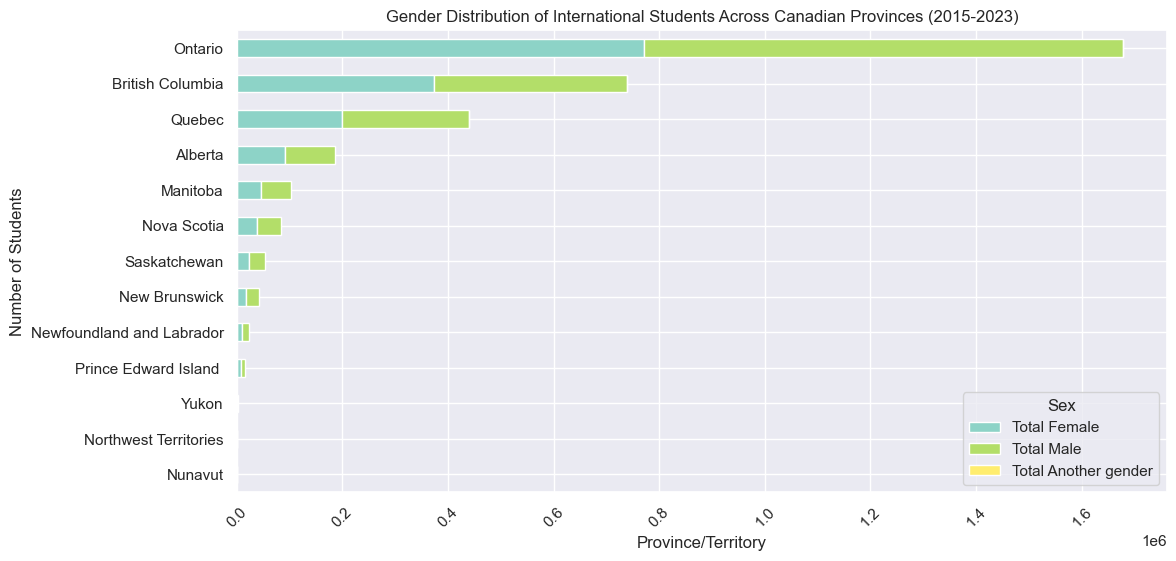

In [200]:
# Ensure numeric data is in the correct format
for year in df_province.columns[2:]:
    df_province[year] = df_province[year].replace(',', '', regex=True).astype(int)  # Remove commas and convert to integer

# Create a pivot table
pivot_df = df_province.pivot_table(index='Province/territory', columns='Sex', values=df_province.columns[2:].tolist(), aggfunc='sum')

# Sum across years for each gender
pivot_df['Total Female'] = pivot_df.xs('Female', axis=1, level='Sex').sum(axis=1)
pivot_df['Total Male'] = pivot_df.xs('Male', axis=1, level='Sex').sum(axis=1)
pivot_df['Total Another gender'] = pivot_df.xs('Another gender', axis=1, level='Sex').sum(axis=1)

# Remove the tuple naming issue
pivot_df.columns = [col if isinstance(col, str) else col[0] for col in pivot_df.columns]

# Prepare the DataFrame for plotting
pivot_df['Total'] = pivot_df[['Total Female', 'Total Male', 'Total Another gender']].sum(axis=1)
pivot_df.sort_values('Total', ascending=True, inplace=True)

# Plotting
pivot_df[['Total Female', 'Total Male', 'Total Another gender']].plot(kind='barh', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Gender Distribution of International Students Across Canadian Provinces (2015-2023)')
plt.xlabel('Province/Territory')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='lower right')
plt.show()

## Heatmap for Student Distribution by Year and Province

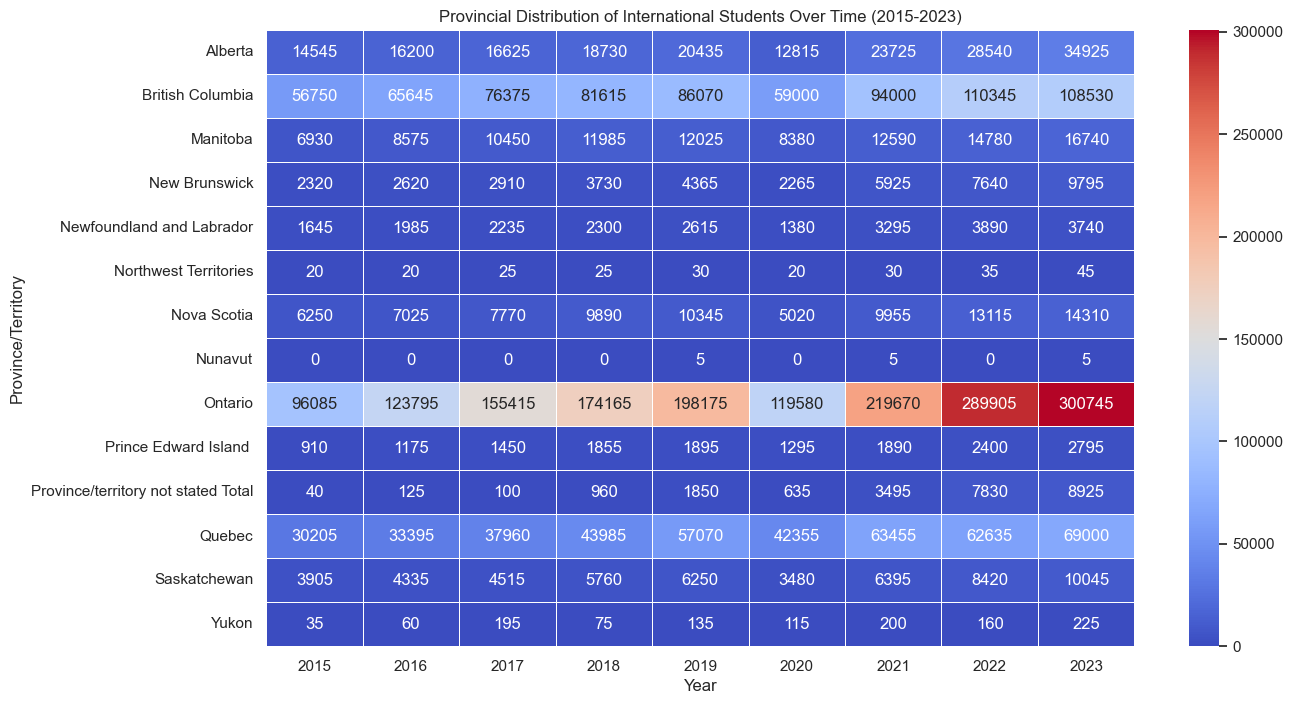

In [202]:
# Assuming the 'Sex' and 'Province/territory' are the first two columns and all other columns are years with student numbers
columns_to_convert = df_province.columns[2:]  # Adjust this if your data structure is different

# Ensure numeric data is in the correct format
df_province[columns_to_convert] = df_province[columns_to_convert].replace(',', '', regex=True).astype(int)

# Group the data by 'Province/territory' and sum up all the numeric columns (years)
df_province_grouped = df_province.groupby('Province/territory')[columns_to_convert].sum()

# Generate a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df_province_grouped, annot=True, fmt="d", cmap='coolwarm', linewidths=.5)
plt.title('Provincial Distribution of International Students Over Time (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Province/Territory')
plt.show()

#  Merging Study Level Data

In [228]:

df_province.info()
df_study.info()
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Province/territory  44 non-null     object
 1   Sex                 43 non-null     object
 2   2015                44 non-null     object
 3   2016                44 non-null     object
 4   2017                44 non-null     object
 5   2018                44 non-null     object
 6   2019                44 non-null     object
 7   2020                44 non-null     object
 8   2021                44 non-null     object
 9   2022                44 non-null     object
 10  2023                44 non-null     object
dtypes: object(11)
memory usage: 3.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Province/Territory  50 non-n

In [234]:
# Standardizing column names
df_student.rename(columns={'Country of Citizenship': 'Country/Territory'}, inplace=True)
df_province.rename(columns={'Province/territory': 'Province/Territory'}, inplace=True)


In [240]:
print("Columns in df_student:")
print(df_student.columns)

print("Columns in df_province:")
print(df_province.columns)

print("Columns in df_study:")
print(df_study.columns)

Columns in df_student:
Index(['Country/Territory', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')
Columns in df_province:
Index(['Province/Territory', 'Sex', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023'],
      dtype='object')
Columns in df_study:
Index(['Province/Territory', 'study level', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')


Country/Territory    0
2015                 0
2016                 0
2017                 0
2018                 0
2019                 0
2020                 0
2021                 0
2022                 0
2023                 0
dtype: int64
Province/Territory    0
Sex                   1
2015                  0
2016                  0
2017                  0
2018                  0
2019                  0
2020                  0
2021                  0
2022                  0
2023                  0
dtype: int64
Province/Territory    0
study level           0
2015                  0
2016                  0
2017                  0
2018                  0
2019                  0
2020                  0
2021                  0
2022                  0
2023                  0
dtype: int64
Country/Territory    object
2015                  int64
2016                  int64
2017                  int64
2018                  int64
2019                  int64
2020                  int64
2021   

In [278]:
df_student.columns



Index(['Country/Territory', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')

In [274]:
df_province.columns

Index(['Province/Territory', 'Sex', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023'],
      dtype='object')

In [276]:
df_study.columns

Index(['Province/Territory', 'study level', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [280]:
# Ensure column names are consistent
df_student.columns = df_student.columns.str.strip().str.lower().str.replace(' ', '_')
df_province.columns = df_province.columns.str.strip().str.lower().str.replace(' ', '_')
df_study.columns = df_study.columns.str.strip().str.lower().str.replace(' ', '_')


# Correlations between provinces and student trends

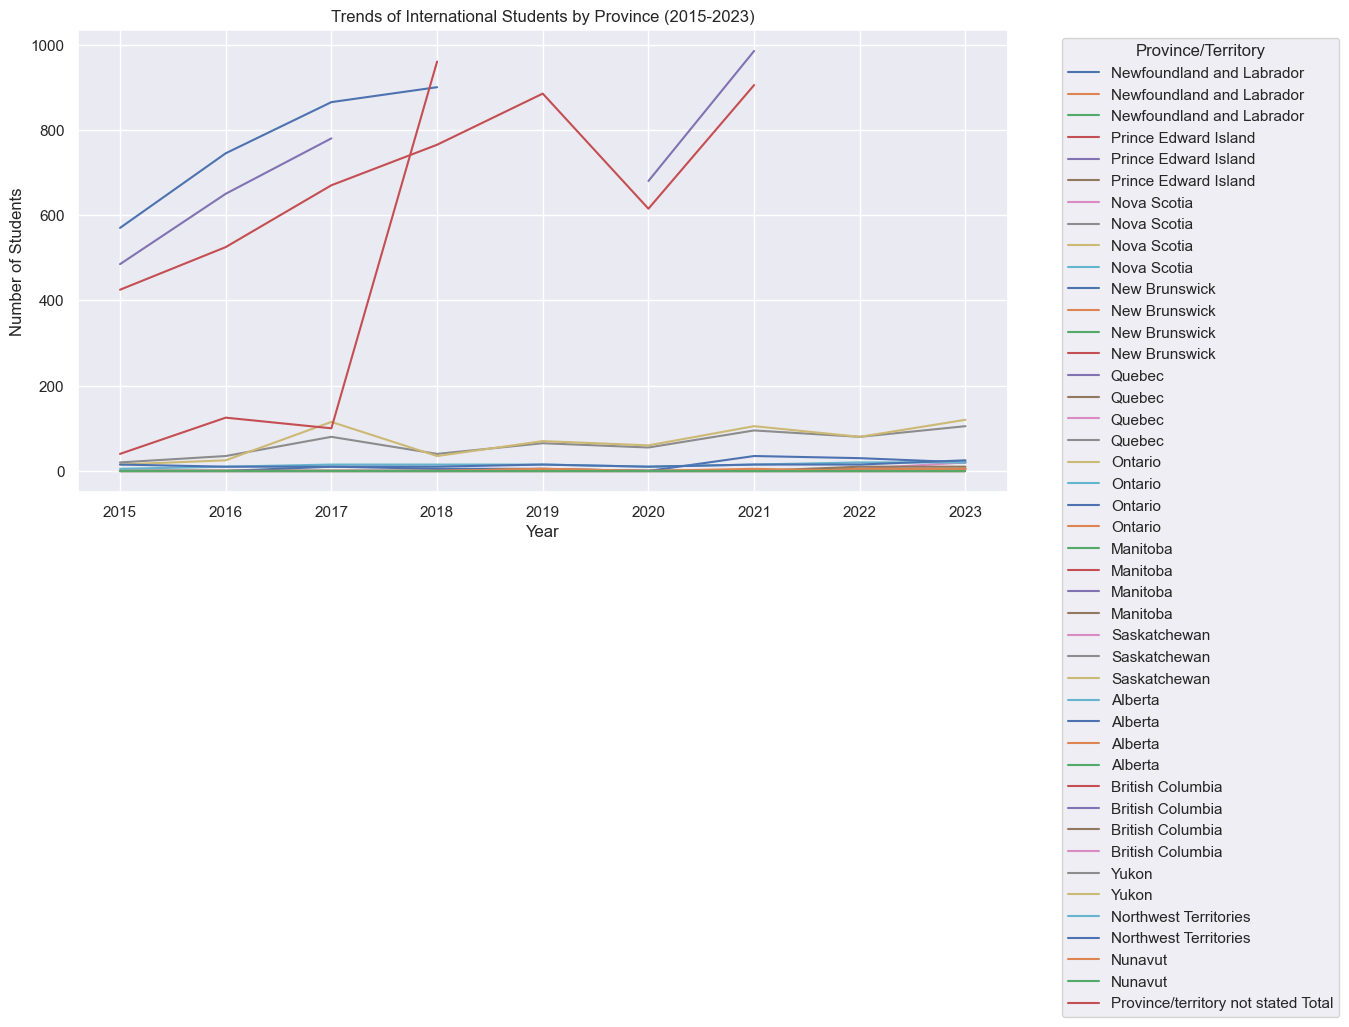

In [284]:
province_trends = df_province.set_index('province/territory')[years].transpose()
province_trends.plot(figsize=(12, 6))
plt.title('Trends of International Students by Province (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend(title='Province/Territory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


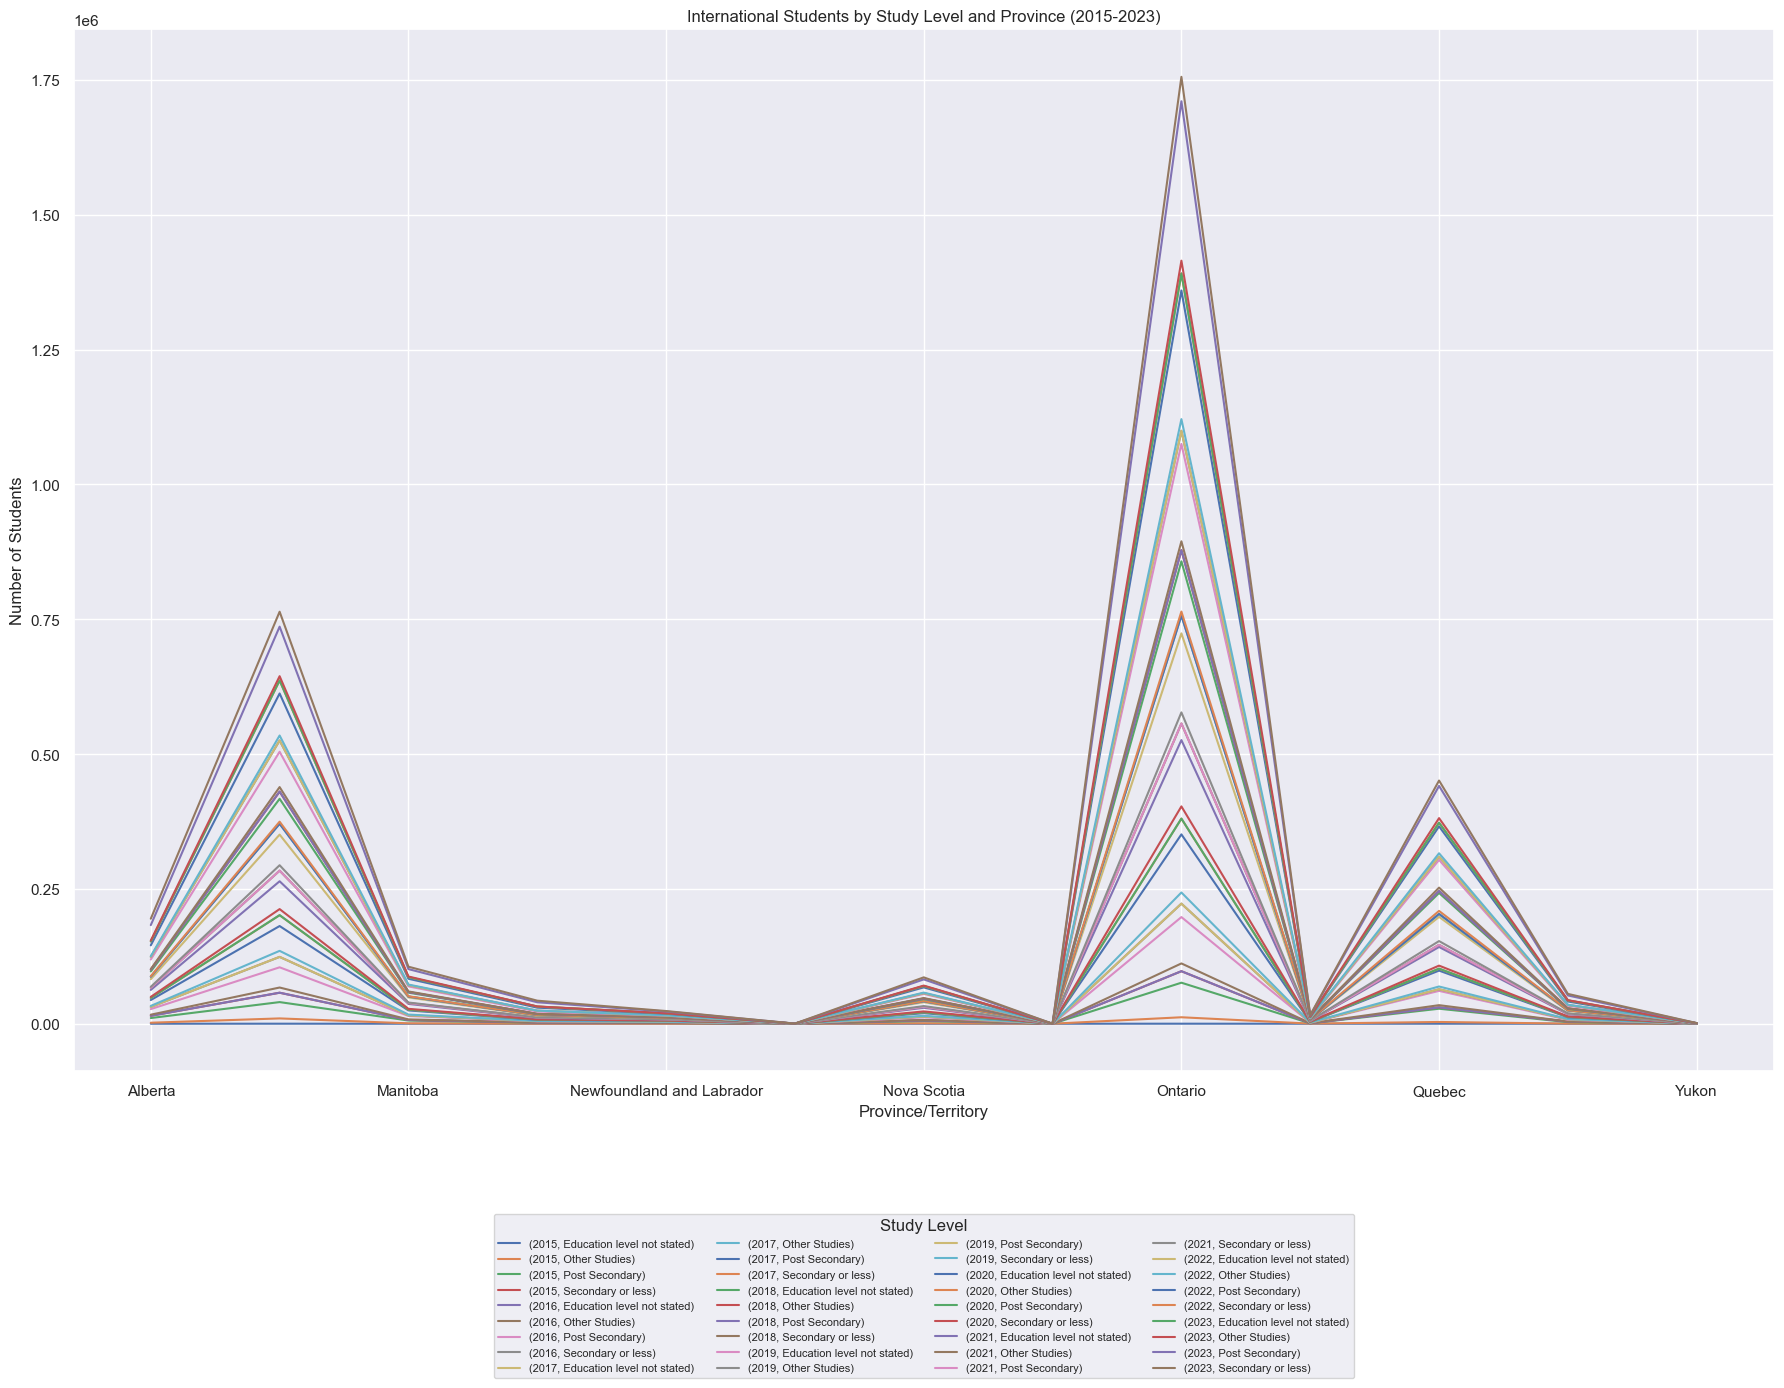

In [324]:
study_level_province.plot(figsize=(18, 12), stacked=True)
plt.title('International Students by Study Level and Province (2015-2023)')
plt.xlabel('Province/Territory')
plt.ylabel('Number of Students')
plt.legend(title='Study Level', loc='lower center', ncol=len(df_study['study_level'].unique()), bbox_to_anchor=(0.5, -0.3), fontsize=8)
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

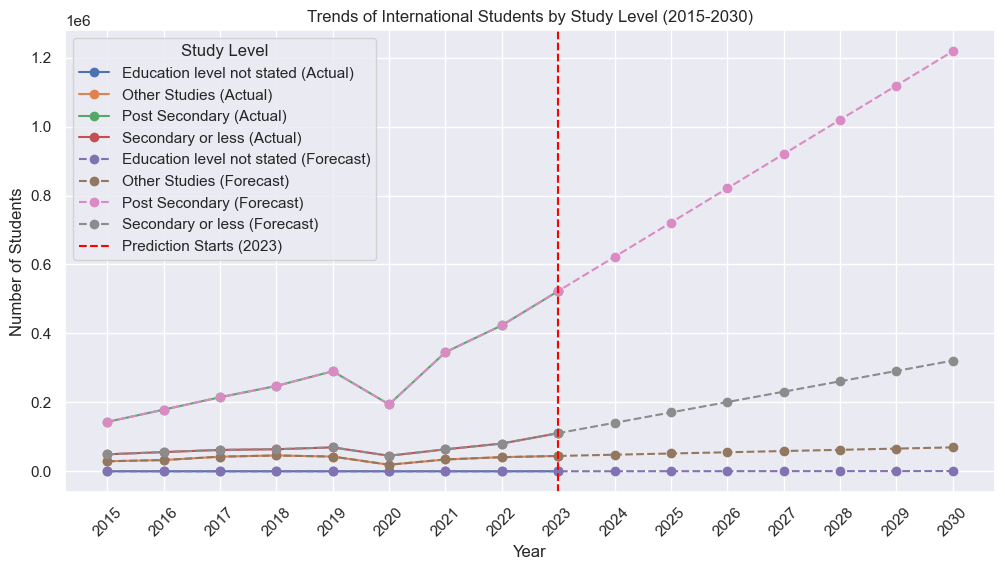

In [408]:
# Initialize a new DataFrame for future predictions
study_level_future_trends = pd.DataFrame(index=future_years, columns=study_level_trends.columns)

# Forecast for each study level
for study_level in study_level_trends.columns:
    trend = study_level_trends[study_level]
    
    # Ensure trend values are numeric (convert to float if necessary)
    trend = pd.to_numeric(trend, errors='coerce')

    # Calculate the trend (simple linear prediction based on the last 2 data points)
    last_known_year = trend.index[-1]
    last_known_value = trend.iloc[-1]
    avg_increase = (trend.iloc[-1] - trend.iloc[-2])

    # Predict future years (2023-2030)
    future_predictions = [last_known_value + (i - last_known_year) * avg_increase for i in future_years]

    # Add the future predictions to the study_level_future_trends DataFrame
    study_level_future_trends[study_level] = future_predictions

# Concatenate the actual data with the future predictions
study_level_trends_future = pd.concat([study_level_trends, study_level_future_trends])

# Plotting the trends by study level
plt.figure(figsize=(12, 6))

# Plot the actual data (2015-2023)
for study_level in study_level_trends.columns:
    plt.plot(study_level_trends.index, study_level_trends[study_level], marker='o', label=f'{study_level} (Actual)')

# Plot the predicted data (2024-2030) in a different color
for study_level in study_level_trends_future.columns:
    if study_level in study_level_trends.columns:  # Plot the forecasted data for already existing study levels
        plt.plot(study_level_trends_future.index, study_level_trends_future[study_level], linestyle='--', marker='o', label=f'{study_level} (Forecast)')

# Add a vertical line at 2023 to indicate when the prediction starts
plt.axvline(x=2023, color='red', linestyle='--', label='Prediction Starts (2023)')

# Customize plot
plt.title('Trends of International Students by Study Level (2015-2030)')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(np.arange(2015, 2031, 1), rotation=45) 
plt.legend(title='Study Level')
plt.grid(True)
plt.show()


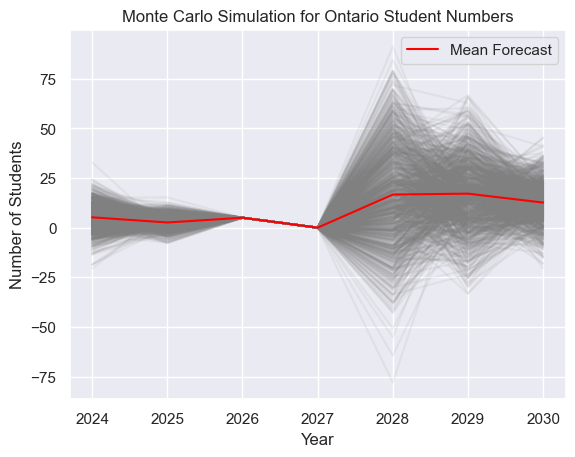

In [410]:
mean = province_data.mean(axis=0)
std_dev = province_data.std(axis=0) 

# Simulate future student populations for each year (2024-2030)
simulations = 1000
simulated_data = np.random.normal(loc=mean[-7:], scale=std_dev[-7:], size=(simulations, 7))  # 7 future years

# Plot the simulated results
plt.plot(range(2024, 2031), simulated_data.T, color='gray', alpha=0.1)  # All simulations
plt.plot(range(2024, 2031), simulated_data.mean(axis=0), label='Mean Forecast', color='red')
plt.title('Monte Carlo Simulation for Ontario Student Numbers')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.show()


In [436]:
# Check the number of rows in df_province
num_rows = len(df_province)
print(f"Number of rows in df_province: {num_rows}")

# If necessary, repeat the provinces list to match the number of rows
# Assuming there are 44 rows and 13 provinces, we need to repeat the provinces list
repeated_provinces = provinces * (num_rows // len(provinces)) + provinces[:(num_rows % len(provinces))]

# Add 'Province/Territory' column to the df_province dataframe
df_province['Province/Territory'] = repeated_provinces

# Now, melt the dataframe to long format
df_province_long = df_province.melt(id_vars=['Province/Territory', 'sex'], 
                                    value_vars=[str(year) for year in range(2015, 2024)], 
                                    var_name='Year', 
                                    value_name='Student_Count')

# Convert 'Year' to datetime
df_province_long['Year'] = pd.to_datetime(df_province_long['Year'], format='%Y')

# Check if data is properly formatted
print(df_province_long.head())


Number of rows in df_province: 44
          Province/Territory             sex       Year  Student_Count
0  Newfoundland and Labrador          Female 2015-01-01          570.0
1       Prince Edward Island            Male 2015-01-01            NaN
2                Nova Scotia  Another gender 2015-01-01            0.0
3              New Brunswick          Female 2015-01-01          425.0
4                     Quebec            Male 2015-01-01          485.0


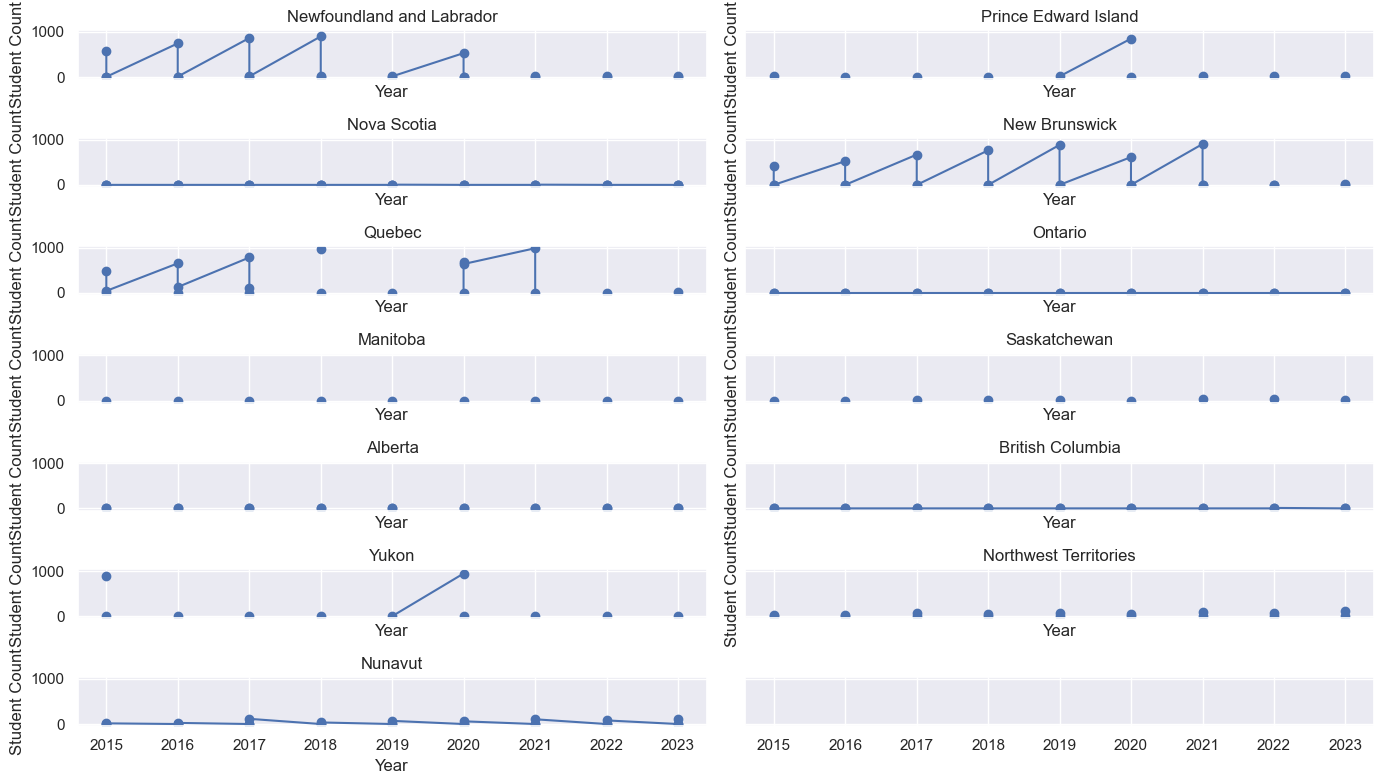

In [460]:
import matplotlib.pyplot as plt

# Function to plot time series data in subplots for all provinces
def plot_time_series_subplots(df_province_long):
    # Get unique provinces
    provinces = df_province_long['Province/Territory'].unique()
    
    # Determine number of rows and columns for subplots
    n = len(provinces)
    cols = 2  # Two columns per row
    rows = (n + 1) // cols  # Calculate number of rows needed

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(14, 8), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten axes array for easier indexing
    
    # Plot data for each province in a separate subplot
    for i, province in enumerate(provinces):
        province_data = df_province_long[df_province_long['Province/Territory'] == province]
        axes[i].plot(province_data['Year'], province_data['Student_Count'], marker='o', color='b')
        axes[i].set_title(province)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Student Count')
        axes[i].grid(True)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Call the function to plot in subplots for all provinces
plot_time_series_subplots(df_province_long)


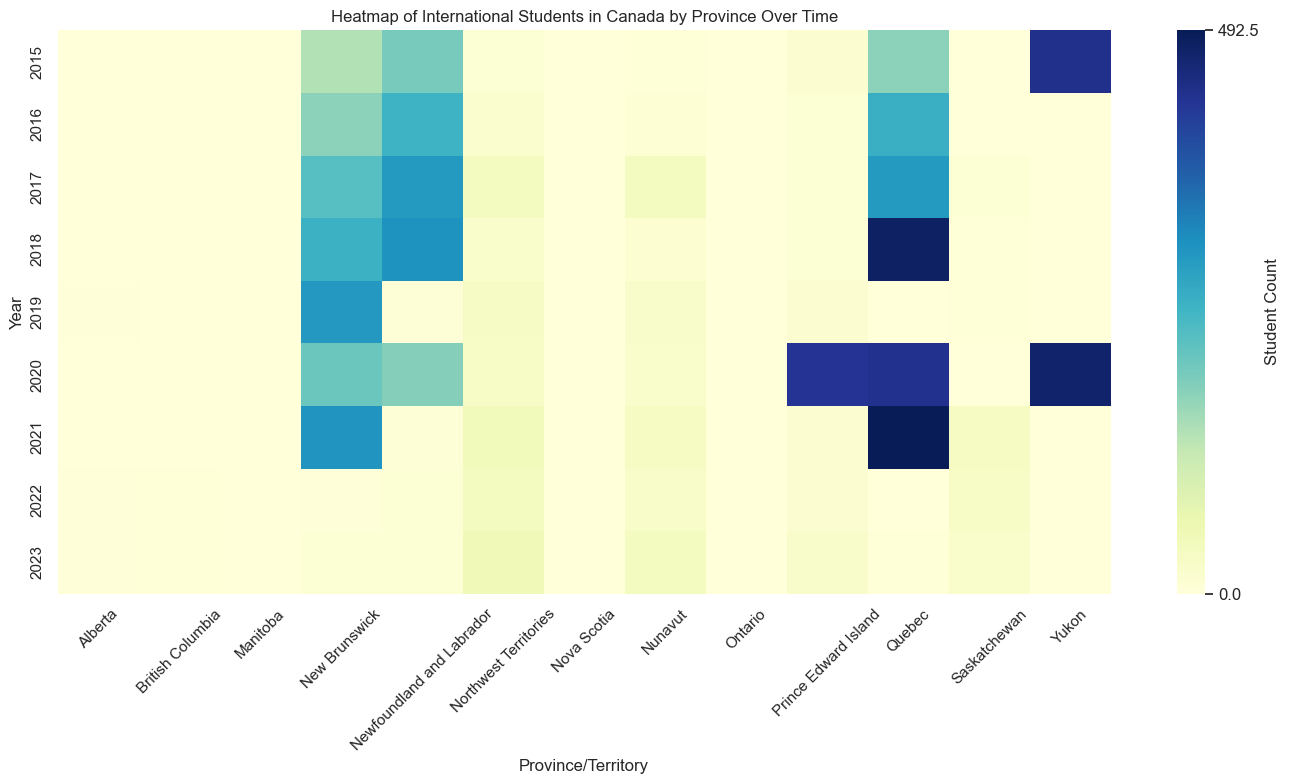

In [468]:
# Function to plot a heatmap for international student counts by province over time
def plot_time_series_heatmap(df_province_long):
    # Ensure that 'Year' is formatted as a datetime type and extract only the year (YYYY format)
    df_province_long['Year'] = pd.to_datetime(df_province_long['Year'], format='%Y').dt.year
    
    # Pivot the data to have 'Year' as rows, 'Province/Territory' as columns, and 'Student_Count' as values
    df_pivot = df_province_long.pivot_table(index='Year', columns='Province/Territory', values='Student_Count')
    
    # Plotting the heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(df_pivot, cmap='YlGnBu', cbar_kws={'label': 'Student Count'})
    
    # Adding labels and title
    plt.title('Heatmap of International Students in Canada by Province Over Time')
    plt.xlabel('Province/Territory')
    plt.ylabel('Year')
    
    # Customizing the colorbar to represent only the range of student counts
    cbar = plt.gca().collections[0].colorbar
    cbar.set_ticks([df_pivot.min().min(), df_pivot.max().max()])  # Set colorbar ticks to min and max student count
    cbar.ax.tick_params(labelsize=12)  # Adjust the label size of the colorbar ticks
    
    # Display only the year (YYYY) format
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function to plot the heatmap
plot_time_series_heatmap(df_province_long)


<Figure size 2500x1200 with 0 Axes>

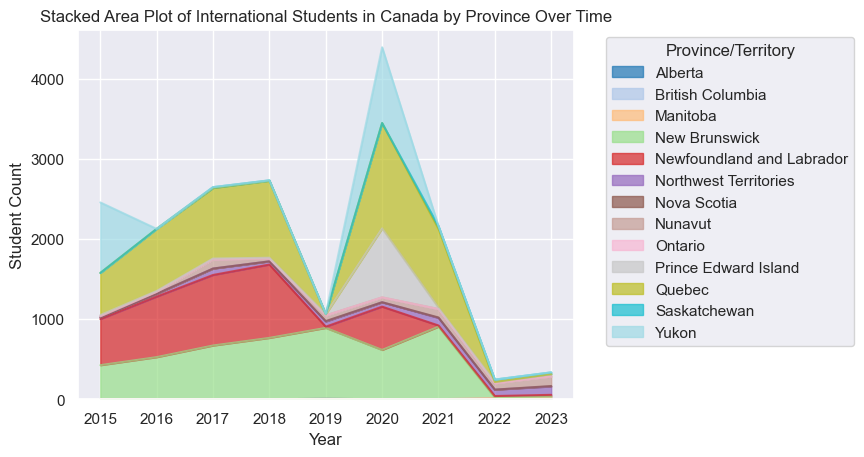

In [490]:
def plot_stacked_area(df_province_long):
    # Pivot the data to have 'Year' as rows, 'Province/Territory' as columns, and 'Student_Count' as values
    df_pivot = df_province_long.pivot_table(index='Year', columns='Province/Territory', values='Student_Count', aggfunc='sum')
    

    df_pivot = df_pivot.sort_index()
    

    plt.figure(figsize=(25, 12))
    df_pivot.plot.area(stacked=True, colormap='tab20', alpha=0.7)
    

    plt.title('Stacked Area Plot of International Students in Canada by Province Over Time')
    plt.xlabel('Year')
    plt.ylabel('Student Count')
    plt.grid(True)

    plt.legend(title='Province/Territory', bbox_to_anchor=(1.05, 1), loc='upper left')
 
    plt.show()

# Call the function to plot the stacked area plot
plot_stacked_area(df_province_long)